<a href="https://colab.research.google.com/github/KISHOREKUMAR2506/RAIL_CRACK_DETECTION/blob/main/Rail_crack_detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 49.00%
Precision: 0.49
Recall: 0.48
F1 Score: 0.48
False Detection Rate: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       302
           1       0.49      0.48      0.48       298

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600


Step-by-step output for each test sample:
Test Sample 1: Crack Detected
Test Sample 2: Crack Detected
Test Sample 3: No Crack Detected
Test Sample 4: Crack Detected
Test Sample 5: Crack Detected
Test Sample 6: No Crack Detected
Test Sample 7: Crack Detected
Test Sample 8: Crack Detected
Test Sample 9: No Crack Detected
Test Sample 10: Crack Detected
Test Sample 11: No Crack Detected
Test Sample 12: Crack Detected
Test Sample 13: No Crack Detected
Test Sample 14: Crack Detected
Test Sample 15: No Crack Detected
Test Sample 16: No Crack Detected
Test

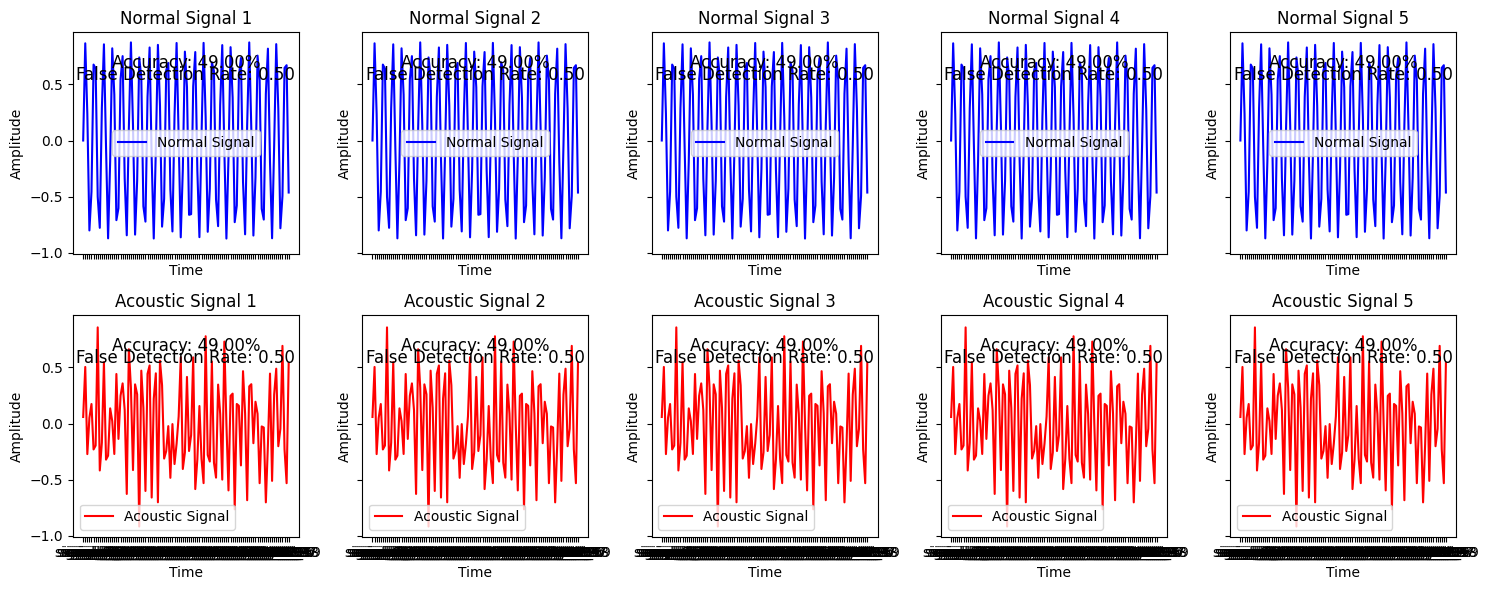

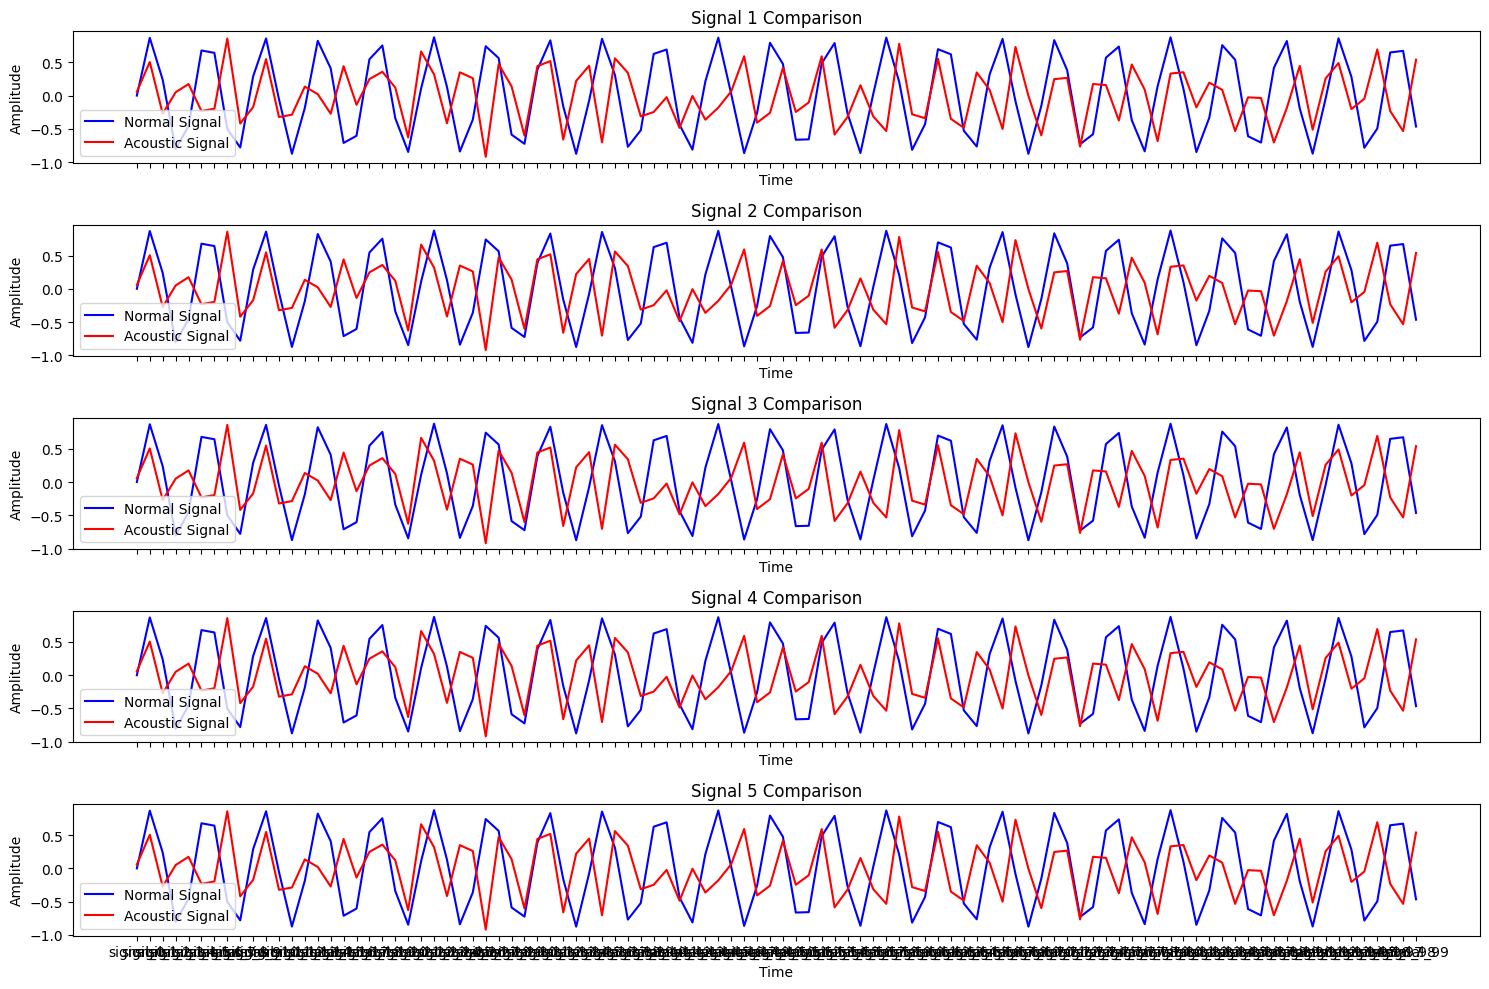

<ipython-input-1-d8c68c4d2ec7>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis', ax=ax)


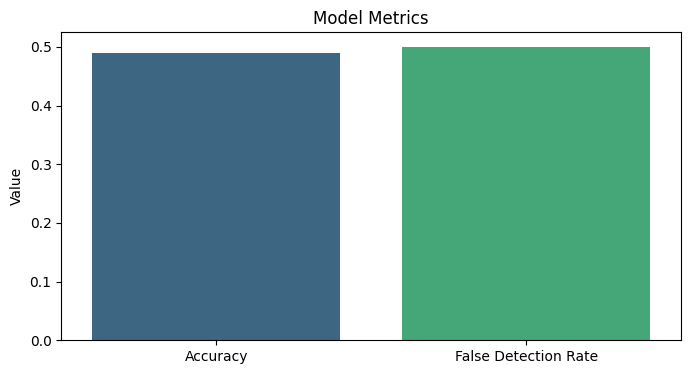

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with actual path to your dataset)
data = pd.read_csv('/content/acoustic_wave_combined.csv')

# Split dataset into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings appear
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate false detection rate
false_detection_rate = conf_matrix[0, 1] / np.sum(conf_matrix[0, :])

# Output the accuracy and additional metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"False Detection Rate: {false_detection_rate:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display individual predictions (step-by-step output for each test sample)
print("\nStep-by-step output for each test sample:")
for i in range(len(y_test)):
    if y_pred[i] == 1:
        print(f"Test Sample {i+1}: Crack Detected")
    else:
        print(f"Test Sample {i+1}: No Crack Detected")

# Plotting combined waveforms for normal and acoustic signals
num_signals = min(5, len(X.columns))  # Limit number of signals to plot for clarity

# Separate features and labels
normal_signals = X[y == 0]
acoustic_signals = X[y == 1]

# Plot waveforms for normal and acoustic signals with metrics
fig, axs = plt.subplots(2, num_signals, figsize=(15, 6), sharex=True, sharey=True)

for i in range(num_signals):
    # Plot normal signals
    axs[0, i].plot(normal_signals.iloc[0, :], color='blue', label='Normal Signal')
    axs[0, i].set_title(f'Normal Signal {i+1}')
    axs[0, i].set_xlabel('Time')
    axs[0, i].set_ylabel('Amplitude')
    axs[0, i].legend()
    # Add accuracy and false detection rate as text
    axs[0, i].text(0.5, 0.9, f'Accuracy: {accuracy * 100:.2f}%', transform=axs[0, i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', color='black')
    axs[0, i].text(0.5, 0.85, f'False Detection Rate: {false_detection_rate:.2f}', transform=axs[0, i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', color='black')

    # Plot acoustic signals
    axs[1, i].plot(acoustic_signals.iloc[0, :], color='red', label='Acoustic Signal')
    axs[1, i].set_title(f'Acoustic Signal {i+1}')
    axs[1, i].set_xlabel('Time')
    axs[1, i].set_ylabel('Amplitude')
    axs[1, i].legend()
    # Add accuracy and false detection rate as text
    axs[1, i].text(0.5, 0.9, f'Accuracy: {accuracy * 100:.2f}%', transform=axs[1, i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', color='black')
    axs[1, i].text(0.5, 0.85, f'False Detection Rate: {false_detection_rate:.2f}', transform=axs[1, i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center', color='black')

plt.tight_layout()
plt.show()

# Combined plot for comparison
fig, axs = plt.subplots(num_signals, 1, figsize=(15, 2*num_signals), sharex=True, sharey=True)

for i in range(num_signals):
    axs[i].plot(normal_signals.iloc[0, :], color='blue', label='Normal Signal')
    axs[i].plot(acoustic_signals.iloc[0, :], color='red', label='Acoustic Signal')
    axs[i].set_title(f'Signal {i+1} Comparison')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Plot accuracy and false detection rate
metrics = {
    'Accuracy': accuracy,
    'False Detection Rate': false_detection_rate
}

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis', ax=ax)
ax.set_title('Model Metrics')
ax.set_ylabel('Value')
plt.show()
